#### Adicionando o caminho do projeto ao path

In [770]:
import os
os.chdir('/Users/edithvidal/Documents/Github/data_science_analysis/')

#### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [771]:
%pip install missingno
%pip install requests
%matplotlib inline

import numpy as np
import pandas as pd
import missingno as msno
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Lendo os dados da base única de 2018 a 2024

In [856]:
df_accidents = pd.read_csv(
    "acquisition/datatran2018_2024_v0.csv"
)
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436718 entries, 0 to 436717
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      436718 non-null  float64
 1   data_inversa            436718 non-null  object 
 2   dia_semana              436718 non-null  object 
 3   horario                 436718 non-null  object 
 4   uf                      436718 non-null  object 
 5   br                      436267 non-null  float64
 6   km                      436267 non-null  object 
 7   causa_acidente          436718 non-null  object 
 8   tipo_acidente           436718 non-null  object 
 9   classificacao_acidente  436715 non-null  object 
 10  fase_dia                436718 non-null  object 
 11  sentido_via             436718 non-null  object 
 12  condicao_metereologica  436718 non-null  object 
 13  tipo_pista              436718 non-null  object 
 14  tracado_via         

#### Verificando os dados faltantes de cada coluna para ter uma visão geral da base

<Axes: >

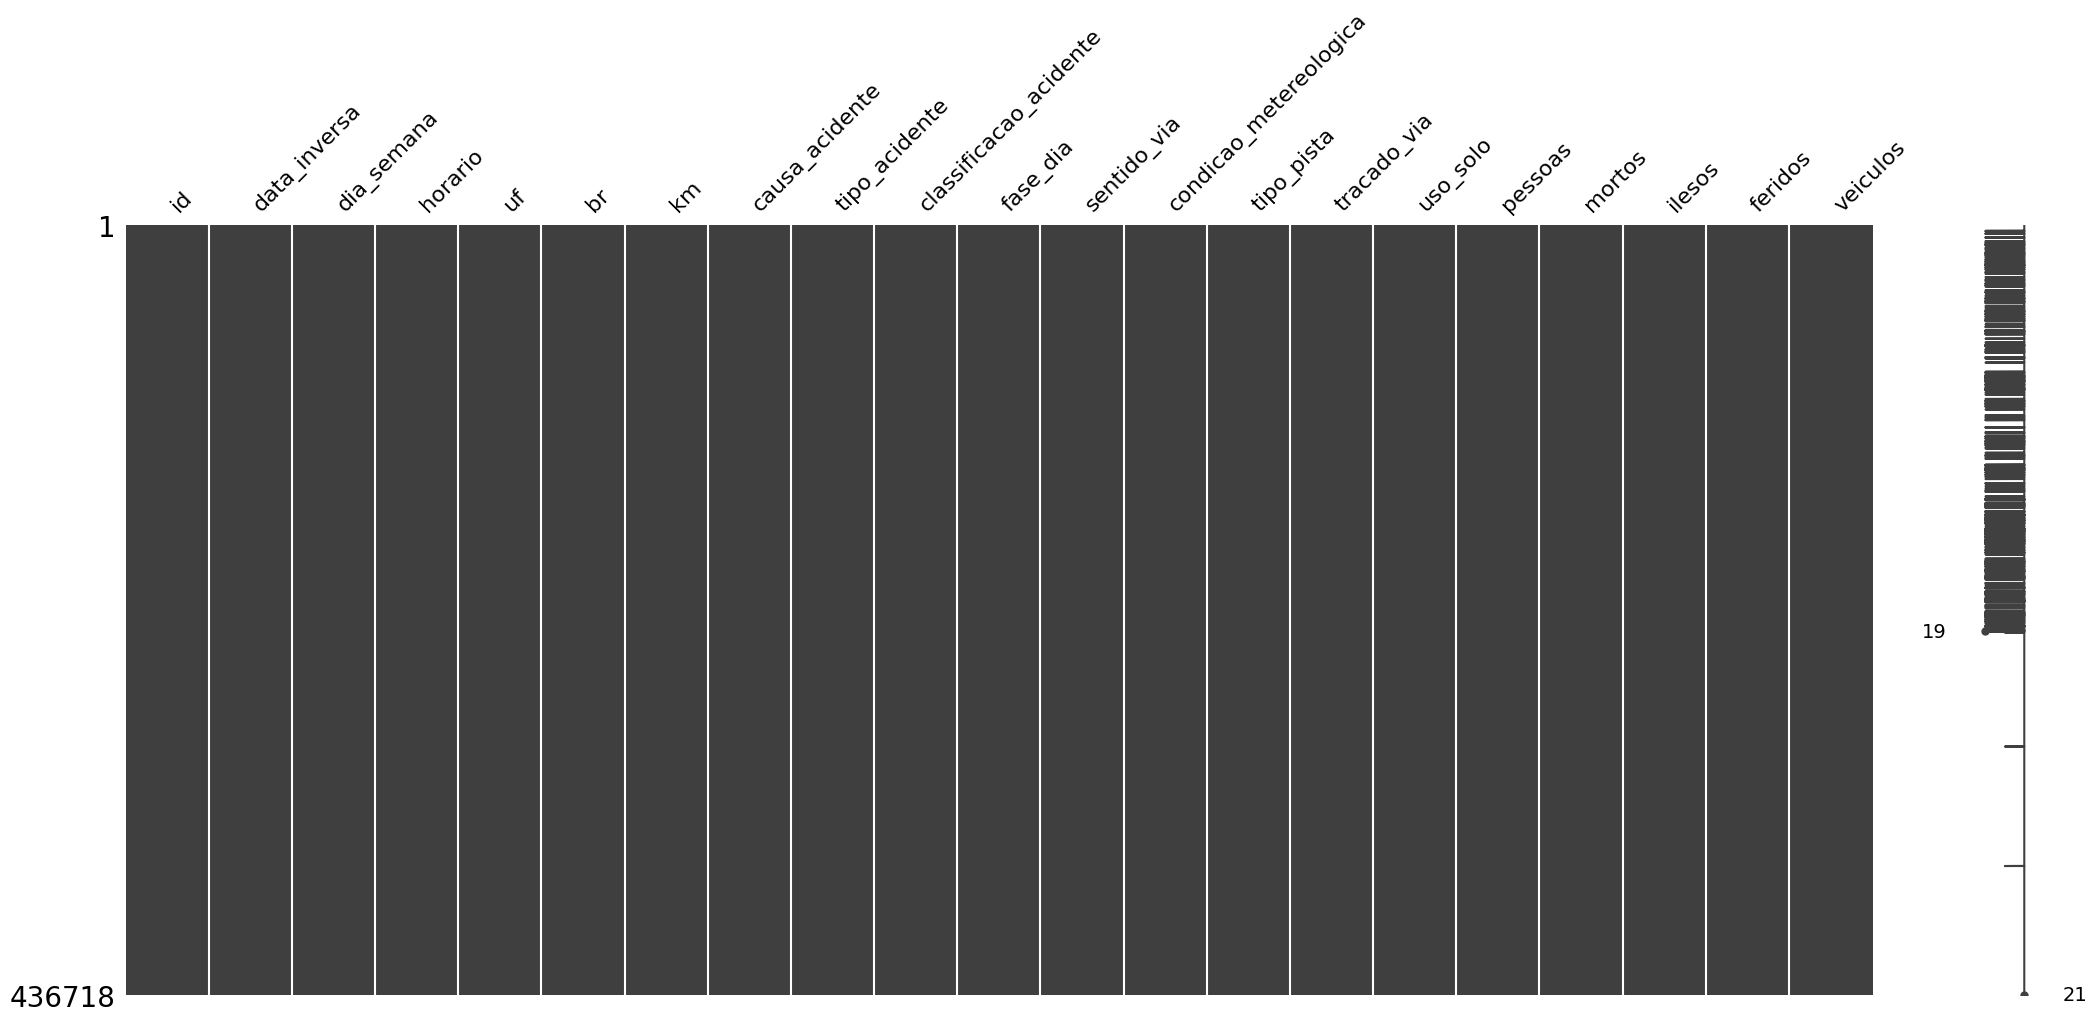

In [773]:
msno.matrix(df=df_accidents)

#### Criando funções auxiliares para tratar o dataframe

In [774]:
def capitalize(df):
    return df.apply(lambda data: data.capitalize())

#### Verificando informações da coluna "br" para identificar dados faltantes

In [775]:
df_accidents["br"].info(verbose=True)

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: br
Non-Null Count   Dtype  
--------------   -----  
436267 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


#### Verificando dados estatísticos da coluna "br"para avaliar a necessidade de tratamento dos dados

In [776]:
df_accidents["br"].describe()

count    436267.000000
mean        212.121939
std         130.577461
min           0.000000
25%         101.000000
50%         158.000000
75%         324.000000
max         498.000000
Name: br, dtype: float64

#### Verificando dados faltantes na coluna "br" para avaliar a necessidade de tratamento dos dados

In [777]:
df = df_accidents.copy()
print(df["br"].isna().value_counts())
print(f'Dados preenchidos com zero: {df[df["br"] == 0].value_counts().sum()}')

br
False    436267
True        451
Name: count, dtype: int64
Dados preenchidos com zero: 545


#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "br"

In [778]:
df_accidents.dropna(subset=["br"], inplace=True)
df_accidents.drop(df_accidents[df_accidents['br'] == 0].index, inplace=True)

#### Verificando dados estatísticos da coluna "br" após o tratamento dos dados

In [779]:
df = df_accidents["br"].value_counts()
df_top_br = pd.DataFrame({
    "frequência": df,
    "percentual": ((df / df.sum()) * 100).round(1)
})
df_top_br

,frequência,percentual
br,,
101.0,73787,16.9
116.0,65465,15.0
381.0,21030,4.8
40.0,20747,4.8
153.0,16902,3.9
...,...,...
486.0,1,0.0
494.0,1,0.0
466.0,1,0.0


#### Distribuição dos acidentes por rodovia (BR)

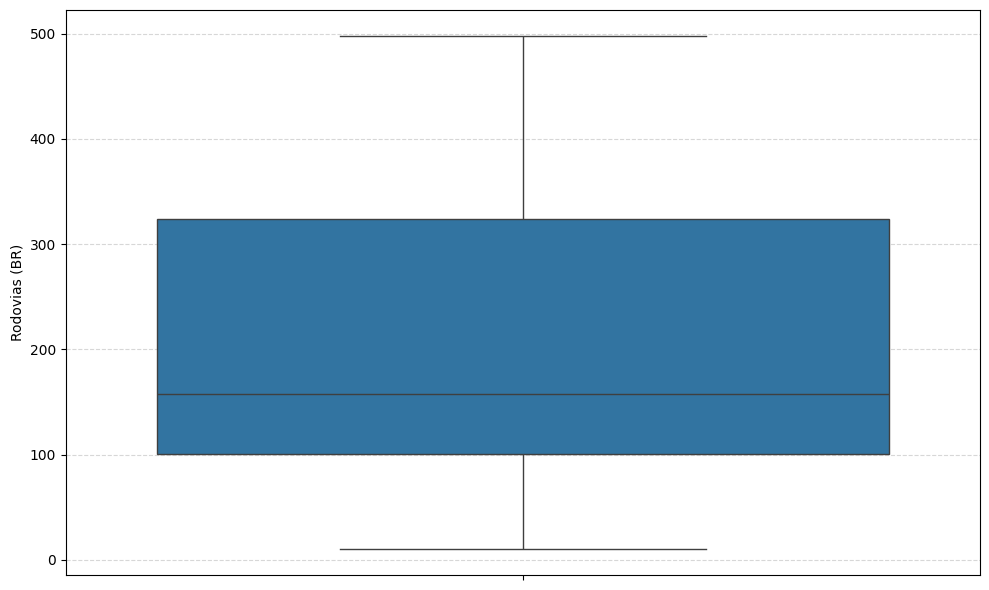

In [780]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_accidents["br"])
plt.ylabel("Rodovias (BR)")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### Verificando informações da coluna "km" para identificar dados faltantes

In [781]:
df_accidents["km"].info()

<class 'pandas.core.series.Series'>
Index: 435722 entries, 0 to 436717
Series name: km
Non-Null Count   Dtype 
--------------   ----- 
435722 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "km"para avaliar a necessidade de tratamento dos dados

In [782]:
df_accidents["km"].describe()

count     435722
unique      9740
top            1
freq        1911
Name: km, dtype: object

#### Verificando dados faltantes na coluna "km" para avaliar a necessidade de tratamento dos dados

In [783]:
df_accidents["km"].isna().value_counts()

km
False    435722
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "km" após o tratamento dos dados

In [784]:
df_accidents["km"].describe()

count     435722
unique      9740
top            1
freq        1911
Name: km, dtype: object

#### Agrupando os dados por br e km para identificar a quais rodovias pertencem os kms com mais acidentes

In [785]:
df = df_accidents.copy()
df = df.groupby(["km", "br"]).size().reset_index(
    name="frequência").sort_values("frequência", ascending=False).head(10)

df["percentual"] = (df["frequência"] / df["frequência"].sum()) * 100
df["percentual"] = df["percentual"].round(1)

print(df)

        km     br  frequência  percentual
27690  219  116.0         377        13.1
25560  206  101.0         301        10.4
25703  207  101.0         292        10.1
29760  230  116.0         289        10.0
29218  228  116.0         274         9.5
28551  223  116.0         272         9.4
28411  222  116.0         272         9.4
29092  227  116.0         272         9.4
26434  210  101.0         270         9.4
25841  208  101.0         264         9.2


#### Verificando informações da coluna "data_inversa"

In [786]:
df_accidents["data_inversa"].info()

<class 'pandas.core.series.Series'>
Index: 435722 entries, 0 to 436717
Series name: data_inversa
Non-Null Count   Dtype 
--------------   ----- 
435722 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "data_inversa"para avaliar a necessidade de tratamento dos dados

In [787]:
df_accidents["data_inversa"].value_counts()


data_inversa
2018-02-10    325
2018-12-22    324
2024-12-21    319
2018-02-09    312
2023-12-23    303
             ... 
2018-05-26     83
2020-03-26     77
2018-05-29     74
2020-03-25     72
2020-03-23     69
Name: count, Length: 2373, dtype: int64

In [788]:
df_accidents["data_inversa"].describe()

count         435722
unique          2373
top       2018-02-10
freq             325
Name: data_inversa, dtype: object

#### Verificando a frequência dos valores da coluna "data_inversa" para avaliar a necessidade de tratamento dos dados

In [789]:
df_accidents["data_inversa"].value_counts().head()

data_inversa
2018-02-10    325
2018-12-22    324
2024-12-21    319
2018-02-09    312
2023-12-23    303
Name: count, dtype: int64

#### Convertendo a coluna data_inversa para Datetime

In [790]:
df_accidents["data_inversa"] = pd.to_datetime(
    df_accidents["data_inversa"], format="%Y-%m-%d")
df_accidents.dtypes

id                               float64
data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                               float64
km                                object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
pessoas                            int64
mortos                             int64
ilesos                             int64
feridos                            int64
veiculos                           int64
dtype: object

#### Ordenando o dataframe por data (crescente)

In [791]:
df_accidents = df_accidents.sort_values(by="data_inversa")
df_accidents["data_inversa"].value_counts().nlargest(10)

data_inversa
2018-02-10    325
2018-12-22    324
2024-12-21    319
2018-02-09    312
2023-12-23    303
2019-12-21    298
2020-12-19    289
2020-10-10    285
2024-10-20    282
2024-12-22    281
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "data_inversa" após do tratamento dos dados

In [792]:
df_accidents["data_inversa"].describe()

count                           435722
mean     2021-07-08 18:49:27.334217216
min                2018-01-01 00:00:00
25%                2019-08-10 00:00:00
50%                2021-04-18 00:00:00
75%                2023-06-26 00:00:00
max                2024-12-31 00:00:00
Name: data_inversa, dtype: object

#### Criando coluna auxiliar mes_ano para facilitar análise futura

In [793]:
df_accidents["mes_ano"] = df_accidents["data_inversa"].dt.to_period("M")
df_accidents["mes_ano"].value_counts().sort_index()

mes_ano
2018-01    6934
2018-02    6180
2018-03    6672
2018-04    5516
2018-05    4812
           ... 
2024-08    6155
2024-09    6207
2024-10    6388
2024-11    6115
2024-12    6574
Freq: M, Name: count, Length: 78, dtype: int64

In [794]:
df_accidents["mes_ano"].dt.year

0         2018
141       2018
142       2018
143       2018
144       2018
          ... 
381926    2024
381925    2024
381924    2024
436404    2024
436366    2024
Name: mes_ano, Length: 435722, dtype: int64

#### Obtendo lista de feriados obtida de uma base de dados externa

In [795]:
from datetime import datetime


def get_holidays(year):
    try:
        response = requests.get(
            f"https://brasilapi.com.br/api/feriados/v1/{year}")
        response.raise_for_status()
        return [{
            "date": datetime.strptime(data["date"], "%Y-%m-%d").strftime("%Y-%m-%d"),
            "name": data["name"]
        } for data in response.json()]
    except requests.exceptions.RequestException as e:
        print(f"Erro ao buscar feriados de {year}: {e}")
        return []

#### Criando coluna feriado preenchendo os registros com o nome do feriado ou dia útil à partir de uma lista de feriados obtida de uma base de dados externa

In [796]:
def get_holidays_for_years(years):
    holidays_dict = {}
    for year in years:
        holidays = get_holidays(year)
        holidays_dict.update({
            pd.to_datetime(holiday["date"]).date(): holiday["name"] for holiday in holidays
        })

    return holidays_dict


df_accidents["tipo_data"] = df_accidents["data_inversa"].map(
    get_holidays_for_years([
        2018,
        2019,
        2020,
        2021,
        2022,
        2023,
        2024]
    )).fillna("Dia útil")
df_accidents["tipo_data"].value_counts()

tipo_data
Dia útil                    420821
Confraternização mundial      1437
Tiradentes                    1278
Dia do trabalho               1272
Proclamação da República      1262
Nossa Senhora Aparecida       1257
Independência do Brasil       1248
Páscoa                        1233
Corpus Christi                1217
Carnaval                      1195
Natal                         1155
Sexta-feira Santa             1130
Finados                       1064
Dia da consciência negra       153
Name: count, dtype: int64

#### Verificando informações da coluna "dia_semana"

In [797]:
df_accidents["dia_semana"].info()

<class 'pandas.core.series.Series'>
Index: 435722 entries, 0 to 436366
Series name: dia_semana
Non-Null Count   Dtype 
--------------   ----- 
435722 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "dia_semana"para avaliar a necessidade de tratamento dos dados

In [798]:
df_accidents["dia_semana"].describe()

count      435722
unique          7
top       domingo
freq        71949
Name: dia_semana, dtype: object

#### Verificando a frequência dos valores da coluna "dia_semana" para avaliar a necessidade de tratamento dos dados

In [799]:
df_accidents["dia_semana"].value_counts()

dia_semana
domingo          71949
sábado           71724
sexta-feira      67124
segunda-feira    59373
quinta-feira     56613
quarta-feira     54973
terça-feira      53966
Name: count, dtype: int64

#### Tratamento da coluna "dia_semana" para corrigir codificação

In [800]:
df_accidents["dia_semana"] = pd.to_datetime(
    df_accidents["data_inversa"], format='%Y/%m/%d').dt.day_of_week.map({
        0: "Segunda-feira",
        1: "Terça-feira",
        2: "Quarta-feira",
        3: "Quinta-feira",
        4: "Sexta-feira",
        5: "Sábado",
        6: "Domingo"
    })
df_accidents["dia_semana"].value_counts()

dia_semana
Domingo          71949
Sábado           71724
Sexta-feira      67124
Segunda-feira    59373
Quinta-feira     56613
Quarta-feira     54973
Terça-feira      53966
Name: count, dtype: int64

#### Verificando informações da coluna "causa_acidente"

In [956]:
df_accidents["causa_acidente"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: causa_acidente
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "causa_acidente"para avaliar a necessidade de tratamento dos dados

In [957]:
df_accidents["causa_acidente"].describe()

count                          436718
unique                             91
top       Falta de Atenção à Condução
freq                            73231
Name: causa_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "causa_acidente" para avaliar a necessidade de tratamento dos dados

In [958]:
df_accidents["causa_acidente"].value_counts()

causa_acidente
Falta de Atenção à Condução                          73231
Velocidade Incompatível                              35819
Reação tardia ou ineficiente do condutor             32348
Ausência de reação do condutor                       29866
Desobediência às normas de trânsito pelo condutor    24089
                                                     ...  
Redutor de velocidade em desacordo                      28
Faróis desregulados                                     24
Sinalização encoberta                                   16
Obstrução Via tentativa Assalto                         10
Sistema de drenagem ineficiente                          7
Name: count, Length: 91, dtype: int64

#### Tratamento da coluna causa_acidente para unificar causas de acidentes similares

In [985]:
def get_causes():
    try:
        with open("wrangling/causas_acidentes.json", "r", encoding="utf-8") as file:
            return json.load(file)
    except Exception as exception:
        print(exception)
        return {}


def get_condition_to_make_changes(causes):
    return df_accidents["causa_acidente"].isin(
        causes.keys())


def get_value_if_match(causes):
    return df_accidents["causa_acidente"].map(
        lambda cause: causes.get(cause, cause).capitalize())


def get_value_if_not_match():
    return df_accidents["causa_acidente"].str.capitalize()


causes = get_causes()
df_accidents["causa_acidente"] = np.where(
    get_condition_to_make_changes(causes), get_value_if_match(causes), get_value_if_not_match())
df_accidents["causa_acidente"].dropna()
df_accidents["causa_acidente"].value_counts()

causa_acidente
Falta de atenção à condução                        73231
Velocidade incompatível                            35819
Reação tardia ou ineficiente do condutor           32348
Ingestão de álcool e/ou substâncias psicoativas    30087
Ausência de reação do condutor                     29866
                                                   ...  
Redutor de velocidade em desacordo                    28
Faróis desregulados                                   24
Sinalização encoberta                                 16
Obstrução via tentativa assalto                       10
Sistema de drenagem ineficiente                        7
Name: count, Length: 81, dtype: int64

#### Verificando informações da coluna "tipo_acidente"

In [805]:
df_accidents["tipo_acidente"].info()

<class 'pandas.core.series.Series'>
Index: 435722 entries, 0 to 436366
Series name: tipo_acidente
Non-Null Count   Dtype 
--------------   ----- 
435722 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "tipo_acidente"para avaliar a necessidade de tratamento dos dados

In [806]:
df_accidents["tipo_acidente"].describe()

count               435722
unique                  21
top       Colisão traseira
freq                 82185
Name: tipo_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "tipo_acidente" para avaliar a necessidade de tratamento dos dados

In [807]:
df_accidents["tipo_acidente"].value_counts()

tipo_acidente
Colisão traseira                   82185
Saída de leito carroçável          68602
Colisão transversal                54785
Tombamento                         36223
Colisão frontal                    29421
Colisão lateral                    24750
Colisão lateral mesmo sentido      23486
Atropelamento de Pedestre          20276
Queda de ocupante de veículo       19596
Colisão com objeto                 16950
Colisão com objeto estático        14328
Capotamento                        12307
Incêndio                            8244
Atropelamento de Animal             7562
Engavetamento                       6780
Colisão lateral sentido oposto      6548
Derramamento de carga               1043
Eventos atípicos                    1034
Colisão com objeto em movimento      965
Danos eventuais                      625
Sinistro pessoal de trânsito          12
Name: count, dtype: int64

#### Tratamento da coluna "tipo_acidente" para remover os dados que são outliers

In [808]:
df = df_accidents.copy()
df = df[~df["tipo_acidente"].isin(
    [
        "Sinistro pessoal de trânsito"
    ]
)]
df_accidents = df
df_accidents["tipo_acidente"].value_counts()

tipo_acidente
Colisão traseira                   82185
Saída de leito carroçável          68602
Colisão transversal                54785
Tombamento                         36223
Colisão frontal                    29421
Colisão lateral                    24750
Colisão lateral mesmo sentido      23486
Atropelamento de Pedestre          20276
Queda de ocupante de veículo       19596
Colisão com objeto                 16950
Colisão com objeto estático        14328
Capotamento                        12307
Incêndio                            8244
Atropelamento de Animal             7562
Engavetamento                       6780
Colisão lateral sentido oposto      6548
Derramamento de carga               1043
Eventos atípicos                    1034
Colisão com objeto em movimento      965
Danos eventuais                      625
Name: count, dtype: int64

#### Tratamento da coluna "tipo_acidente" para capitalizar os dados

In [809]:
df_accidents["tipo_acidente"] = capitalize(
    df_accidents["tipo_acidente"])
df_accidents["tipo_acidente"].value_counts().head()

tipo_acidente
Colisão traseira             82185
Saída de leito carroçável    68602
Colisão transversal          54785
Tombamento                   36223
Colisão frontal              29421
Name: count, dtype: int64

#### Tratamento da coluna "tipo_acidente" para unificar tipos semelhantes de colisão

In [810]:
df_accidents['tipo_acidente'] = df_accidents['tipo_acidente'].replace({
    r'^Colisão lateral.*': 'Colisão lateral',
    r'^Colisão com objeto.*': 'Colisão com objeto'
}, regex=True)
df_accidents['tipo_acidente'].value_counts()

tipo_acidente
Colisão traseira                82185
Saída de leito carroçável       68602
Colisão transversal             54785
Colisão lateral                 54784
Tombamento                      36223
Colisão com objeto              32243
Colisão frontal                 29421
Atropelamento de pedestre       20276
Queda de ocupante de veículo    19596
Capotamento                     12307
Incêndio                         8244
Atropelamento de animal          7562
Engavetamento                    6780
Derramamento de carga            1043
Eventos atípicos                 1034
Danos eventuais                   625
Name: count, dtype: int64

In [811]:
print(f'Média {df["tipo_acidente"].value_counts().mean():.0f}')
print(f'Mediana {df["tipo_acidente"].value_counts().median():.0f}')

Média 27232
Mediana 19936


#### Verificando informações da coluna "classificacao_acidente"

In [812]:
df_accidents["classificacao_acidente"].info()

<class 'pandas.core.series.Series'>
Index: 435710 entries, 0 to 436366
Series name: classificacao_acidente
Non-Null Count   Dtype 
--------------   ----- 
435707 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "classificacao_acidente" para avaliar a necessidade de tratamento dos dados

In [813]:
df_accidents["classificacao_acidente"].describe()

count                  435707
unique                      3
top       Com Vítimas Feridas
freq                   327461
Name: classificacao_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "classificacao_acidente" para avaliar a necessidade de tratamento dos dados

In [814]:
df_accidents["classificacao_acidente"].value_counts()

classificacao_acidente
Com Vítimas Feridas    327461
Sem Vítimas             77728
Com Vítimas Fatais      30518
Name: count, dtype: int64

#### Tratamento da coluna "classificacao_acidente" para definir dados faltantes como "Sem classificação"

In [ ]:
df_accidents.drop(
    df_accidents[df_accidents['classificacao_acidente'].isna()].index, inplace=True)

df_accidents["classificacao_acidente"] = capitalize(
    df_accidents["classificacao_acidente"])
df_accidents["classificacao_acidente"].value_counts()

classificacao_acidente
Com vítimas feridas    327461
Sem vítimas             77728
Com vítimas fatais      30518
Name: count, dtype: int64

#### Acidentes com feridos e sem mortos e sem ilesos

In [951]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["feridos"] != 0) & (df_accidents["ilesos"] == 0) & (df_accidents["mortos"] == 0)]
print(f'Somente feridos {df.shape}')

Somente feridos (140617, 21)


#### Acidentes com mortos e sem feridos e sem ilesos

In [950]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["mortos"] != 0) & (df_accidents["feridos"] == 0) & (df_accidents["ilesos"] == 0)]
print(f'Somente mortos {df.shape}')

Somente mortos (7461, 21)


#### Acidentes com mortos e com feridos e sem ilesos

In [949]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["mortos"] != 0) & (df_accidents["feridos"] != 0) & (df_accidents["ilesos"] == 0)]
print(f'Somente mortos e feridos {df.shape}')

Somente mortos e feridos (6634, 21)


In [952]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["ilesos"] != 0) & (df_accidents["feridos"] == 0) & (df_accidents["mortos"] == 0)]
print(f'Somente ilesos {df.shape}')

Somente ilesos (69860, 21)


#### Acidentes com ilesos e com feridos e sem mortos

In [953]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["ilesos"] != 0) & (df_accidents["feridos"] != 0) & (df_accidents["mortos"] == 0)]
print(f'Somente ilesos {df.shape}')

Somente ilesos (187260, 21)


#### Acidentes com ilesos e com mortos e sem feridos

In [954]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["ilesos"] != 0) & (df_accidents["feridos"] == 0) & (df_accidents["mortos"] != 0)]
print(f'Somente ilesos {df.shape}')

Somente ilesos (11663, 21)


#### Acidentes com ilesos e com feridos e com mortos

In [955]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["ilesos"] != 0) & (df_accidents["feridos"] != 0) & (df_accidents["mortos"] != 0)]
print(f'Somente ilesos {df.shape}')

Somente ilesos (4782, 21)


#### Verificando informações da coluna "fase_dia"

In [818]:
df_accidents["fase_dia"].info()

<class 'pandas.core.series.Series'>
Index: 435707 entries, 0 to 436366
Series name: fase_dia
Non-Null Count   Dtype 
--------------   ----- 
435707 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "fase_dia" para avaliar a necessidade de tratamento dos dados

In [819]:
df_accidents["fase_dia"].describe()

count        435707
unique            4
top       Pleno dia
freq         238334
Name: fase_dia, dtype: object

#### Verificando a frequência dos valores da coluna "fase_dia" para avaliar a necessidade de tratamento dos dados

In [820]:
df_accidents["fase_dia"].value_counts()

fase_dia
Pleno dia      238334
Plena Noite    152333
Anoitecer       24018
Amanhecer       21022
Name: count, dtype: int64

#### Tratamento da coluna "fase_dia" para capitalizar os dados

In [821]:
periods = {
    "00h às 06h (madrugada)": (0, 5),
    "06h às 12h (manhã)": (6, 11),
    "12h às 18h (tarde)": (12, 17),
    "18h às 00h (noite)": (18, 23)
}


def group_by_hour(df):
    return df[df["horario"].notna()]["horario"]


def to_datetime(df):
    return pd.to_datetime(df, format="%H:%M:%S").dt.hour


df = group_by_hour(df_accidents)
df = to_datetime(df)
df_accidents["fase_dia"] = df.apply(
    lambda hour: next(period for period, (start, end)
                      in periods.items() if start <= hour <= end)
)
df = df_accidents["fase_dia"].value_counts()
df.head()

fase_dia
12h às 18h (tarde)        133607
18h às 00h (noite)        126190
06h às 12h (manhã)        121226
00h às 06h (madrugada)     54684
Name: count, dtype: int64

#### Verificando informações da coluna "condicao_metereologica"

In [822]:
df_accidents["condicao_metereologica"].info()

<class 'pandas.core.series.Series'>
Index: 435707 entries, 0 to 436366
Series name: condicao_metereologica
Non-Null Count   Dtype 
--------------   ----- 
435707 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "condicao_metereologica" para avaliar a necessidade de tratamento dos dados

In [823]:
df_accidents["condicao_metereologica"].describe()

count        435707
unique           10
top       Céu Claro
freq         262210
Name: condicao_metereologica, dtype: object

#### Verificando a frequência dos valores da coluna "condicao_metereologica" para avaliar a necessidade de tratamento dos dados

In [824]:
df_accidents["condicao_metereologica"].value_counts()

condicao_metereologica
Céu Claro           262210
Nublado              71610
Chuva                47200
Sol                  29043
Garoa/Chuvisco       15254
Ignorado              5876
Nevoeiro/Neblina      3666
Vento                  824
Granizo                 17
Neve                     7
Name: count, dtype: int64

#### Tratamento da coluna "condicao_metereologica" para remover valor "Ignorado"

In [825]:
def get_condition():
    return df_accidents[df_accidents['condicao_metereologica'] == "Ignorado"]


df_accidents.drop(get_condition().index, inplace=True)
df_accidents["condicao_metereologica"].value_counts()

condicao_metereologica
Céu Claro           262210
Nublado              71610
Chuva                47200
Sol                  29043
Garoa/Chuvisco       15254
Nevoeiro/Neblina      3666
Vento                  824
Granizo                 17
Neve                     7
Name: count, dtype: int64

#### Removendo condições meteorológicas não representativas

In [826]:
df = df_accidents.copy()
df = df[~df["condicao_metereologica"].isin(
    [
        "Granizo",
        "Neve"
    ]
)]
df_accidents = df
df_accidents["condicao_metereologica"].value_counts()

condicao_metereologica
Céu Claro           262210
Nublado              71610
Chuva                47200
Sol                  29043
Garoa/Chuvisco       15254
Nevoeiro/Neblina      3666
Vento                  824
Name: count, dtype: int64

#### Verificando informações da coluna "uso_solo"

In [827]:
df_accidents["uso_solo"].info()

<class 'pandas.core.series.Series'>
Index: 429807 entries, 0 to 436366
Series name: uso_solo
Non-Null Count   Dtype 
--------------   ----- 
429807 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "uso_solo" para avaliar a necessidade de tratamento dos dados

In [828]:
df_accidents["uso_solo"].describe()

count     429807
unique         2
top          Não
freq      241812
Name: uso_solo, dtype: object

#### Verificando a frequência dos valores da coluna "uso_solo" para avaliar a necessidade de tratamento dos dados

In [829]:
df_accidents["uso_solo"].value_counts()

uso_solo
Não    241812
Sim    187995
Name: count, dtype: int64

#### Tratamento da coluna "uso_solo" para alterar para "Urbano" quando "Sim" e "Rural" quando "Não"

In [830]:
df_accidents["uso_solo"] = np.where(
    df_accidents["uso_solo"] == "Sim", "Urbano", "Rural")

df_accidents["uso_solo"].value_counts().head()

uso_solo
Rural     241812
Urbano    187995
Name: count, dtype: int64

#### Verificando informações da coluna "tipo_pista"

In [831]:
df_accidents["tipo_pista"].info()

<class 'pandas.core.series.Series'>
Index: 429807 entries, 0 to 436366
Series name: tipo_pista
Non-Null Count   Dtype 
--------------   ----- 
429807 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "tipo_pista" para avaliar a necessidade de tratamento dos dados

In [832]:
df_accidents["tipo_pista"].describe()

count      429807
unique          3
top       Simples
freq       213830
Name: tipo_pista, dtype: object

#### Verificando a frequência dos valores da coluna "tipo_pista" para avaliar a necessidade de tratamento dos dados

In [833]:
df_accidents["tipo_pista"].value_counts()

tipo_pista
Simples     213830
Dupla       178428
Múltipla     37549
Name: count, dtype: int64

#### Verificando informações da coluna "sentido_via"

In [834]:
df_accidents["sentido_via"].info()

<class 'pandas.core.series.Series'>
Index: 429807 entries, 0 to 436366
Series name: sentido_via
Non-Null Count   Dtype 
--------------   ----- 
429807 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "sentido_via" para avaliar a necessidade de tratamento dos dados

In [835]:
df_accidents["sentido_via"].describe()

count        429807
unique            2
top       Crescente
freq         230458
Name: sentido_via, dtype: object

#### Verificando a frequência dos valores da coluna "sentido_via" para avaliar a necessidade de tratamento dos dados

In [836]:
df_accidents["sentido_via"].value_counts()

sentido_via
Crescente      230458
Decrescente    199349
Name: count, dtype: int64

#### Tratamento da coluna "sentido_via" para remover dados com valor "Não Informado"

In [837]:
def get_condition():
    return df_accidents[df_accidents['sentido_via'] == "Não Informado"]


df_accidents.drop(get_condition().index, inplace=True)
df_accidents["sentido_via"].value_counts()

sentido_via
Crescente      230458
Decrescente    199349
Name: count, dtype: int64

#### Verificando informações da coluna "tracado_via"

In [838]:
df_accidents["tracado_via"].info()

<class 'pandas.core.series.Series'>
Index: 429807 entries, 0 to 436366
Series name: tracado_via
Non-Null Count   Dtype 
--------------   ----- 
429807 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "tracado_via" para avaliar a necessidade de tratamento dos dados

In [839]:
df_accidents["tracado_via"].describe()

count     429807
unique       969
top         Reta
freq      253857
Name: tracado_via, dtype: object

#### Verificando a frequência dos valores da coluna "tracado_via" para avaliar a necessidade de tratamento dos dados

In [840]:
tracado_via = df_accidents["tracado_via"].value_counts().reset_index()
tracado_via

,tracado_via,count
0,Reta,253857
1,Curva,61752
2,Não Informado,25192
3,Interseção de vias,10542
4,Rotatória,7719
...,...,...
964,Viaduto;Declive;Em Obras,1
965,Interseção de Vias;Aclive;Reta;Retorno Regulam...,1
966,Curva;Ponte;Interseção de Vias;Aclive;Em Obras...,1
967,Curva;Túnel;Viaduto,1


#### Exportando os traçados de via encontrados (973) para um arquivo para analisar como fazer o tratamento

In [841]:
tracado_via.index.to_frame(
    name="tracado_via").to_csv("wrangling/tracado_via.csv", index=False)

#### Removendo a coluna tracado_via, pois seus dados estão muito complexos para serem agrupados. Em alguns casos existem dados com Ponte;Reta e Reta;Ponte. Dessa forma, não é possível saber qual o valor correto. A remoção desta coluna não deve influenciar nas análises posteriores

In [842]:
df_accidents = df_accidents.drop(columns=[
    "tracado_via"
])
df_accidents.head()

,id,data_inversa,dia_semana,horario,uf,br,km,causa_acidente,tipo_acidente,classificacao_acidente,...,condicao_metereologica,tipo_pista,uso_solo,pessoas,mortos,ilesos,feridos,veiculos,mes_ano,tipo_data
0,99973.0,2018-01-01,Segunda-feira,00:20:00,RJ,116.0,"303,5",Condutor dormindo,Saída de leito carroçável,Com vítimas feridas,...,Nublado,Múltipla,Urbano,5,0,1,4,1,2018-01,Confraternização mundial
141,100138.0,2018-01-01,Segunda-feira,16:32:00,RO,364.0,"228,1",Falta de atenção à condução,Colisão traseira,Sem vítimas,...,Nublado,Simples,Rural,2,0,1,0,2,2018-01,Confraternização mundial
142,100139.0,2018-01-01,Segunda-feira,18:20:00,RS,392.0,83,Condutor deixou de manter distância do veículo...,Engavetamento,Sem vítimas,...,Céu Claro,Simples,Rural,3,0,2,0,3,2018-01,Confraternização mundial
143,100140.0,2018-01-01,Segunda-feira,18:20:00,SC,101.0,"82,8",Falta de atenção à condução,Colisão lateral,Com vítimas feridas,...,Céu Claro,Dupla,Rural,5,0,2,2,2,2018-01,Confraternização mundial
144,100141.0,2018-01-01,Segunda-feira,17:35:00,PB,230.0,28,Falta de atenção à condução,Colisão traseira,Com vítimas feridas,...,Céu Claro,Dupla,Urbano,3,0,2,1,2,2018-01,Confraternização mundial


#### Verificando informações da coluna "pessoas"

In [843]:
df_accidents["pessoas"].info()

<class 'pandas.core.series.Series'>
Index: 429807 entries, 0 to 436366
Series name: pessoas
Non-Null Count   Dtype
--------------   -----
429807 non-null  int64
dtypes: int64(1)
memory usage: 6.6 MB


#### Verificando dados estatísticos da coluna "pessoas" para avaliar a necessidade de tratamento dos dados

In [844]:
df_accidents["pessoas"].describe()

count    429807.000000
mean          2.472112
std           2.034471
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          95.000000
Name: pessoas, dtype: float64

#### Verificando a frequência dos valores da coluna "pessoas" para avaliar a necessidade de tratamento dos dados

In [845]:
df_accidents["pessoas"].value_counts().sort_index()

pessoas
1     105103
2     176533
3      80534
4      33887
5      16892
       ...  
75         1
77         1
80         2
93         1
95         1
Name: count, Length: 74, dtype: int64

#### Tratamento da coluna "pessoas" para remover linhas, onde a frequência da quantidade de pessoas envolvidas, em um acidente, é menor que 7 (menos de 1 ocorrência por ano)

In [846]:
def get_condition():
    df = df_accidents["pessoas"].value_counts()
    return df[df <= 99].index


def get_indexes():
    return df_accidents[df_accidents["pessoas"].isin(get_condition())].index


print(f'Índices a serem removidos: {get_indexes()}')

df_accidents.drop(get_indexes(), inplace=True)
df_accidents['pessoas'].describe()

Índices a serem removidos: Index([   173,  12501,    251,    479,   1812,   1315,   1157,   1274,   1616,
         4637,
       ...
       381599, 381626, 435428, 435454, 381749, 435935, 381762, 381808, 435808,
       436043],
      dtype='int64', length=1048)


count    428759.000000
mean          2.407317
std           1.411963
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          14.000000
Name: pessoas, dtype: float64

#### Verificando informações da coluna "veiculos"

In [847]:
df_accidents["veiculos"].info()

<class 'pandas.core.series.Series'>
Index: 428759 entries, 0 to 436366
Series name: veiculos
Non-Null Count   Dtype
--------------   -----
428759 non-null  int64
dtypes: int64(1)
memory usage: 6.5 MB


#### Verificando dados estatísticos da coluna "veiculos" para avaliar a necessidade de tratamento dos dados

In [848]:
df_accidents["veiculos"].describe()

count    428759.000000
mean          1.807852
std           0.924065
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          28.000000
Name: veiculos, dtype: float64

#### Verificando a frequência dos valores da coluna "veiculos" para avaliar a necessidade de tratamento dos dados

In [849]:
df_accidents["veiculos"].value_counts().sort_index().tail(15)

veiculos
7     683
8     320
9     157
10    104
11     56
12     48
13     37
14     23
15     14
16      6
17      4
18      1
19      1
20      1
28      1
Name: count, dtype: int64

In [850]:
def get_condition():
    df = df_accidents["veiculos"].value_counts()
    return df[df <= 99].index


def get_indexes():
    return df_accidents[df_accidents["veiculos"].isin(get_condition())].index


print(f'Índices a serem removidos: {get_indexes()}')

df_accidents.drop(get_indexes(), inplace=True)
print(df_accidents['veiculos'].describe())
print(df_accidents['veiculos'].value_counts())

Índices a serem removidos: Index([ 26214,  31692,  42052,  45008,  69045,  67704,  79051,  81228,  86021,
       114097,
       ...
       377363, 377447, 377974, 378037, 378453, 379125, 380033, 380121, 380543,
       381766],
      dtype='int64', length=192)
count    428567.000000
mean          1.802936
std           0.893562
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          10.000000
Name: veiculos, dtype: float64
veiculos
2     202422
1     170546
3      37107
4      11473
5       4248
6       1507
7        683
8        320
9        157
10       104
Name: count, dtype: int64


#### Análise inicial da coluna uf

In [851]:
df = df_accidents.copy()
print(df["uf"].value_counts())
print(f'Média {df["uf"].value_counts().mean():.0f}')
print(f'Mediana {df["uf"].value_counts().median():.0f}')

uf
MG    55467
SC    51272
PR    47421
RJ    31760
RS    30106
SP    28595
BA    22865
GO    20683
PE    17822
ES    16037
MT    14611
MS    10182
PB    10097
CE     9780
RO     9345
RN     8939
PI     8202
MA     7151
DF     6347
PA     5861
AL     4081
TO     3776
SE     3568
AC     1559
RR     1307
AP      978
AM      755
Name: count, dtype: int64
Média 15873
Mediana 9780


#### Reordenando o dataframe antes de salvar

In [ ]:
df_accidents = df_accidents[[
    "id",
    "data_inversa",
    "tipo_data",
    'mes_ano',
    "dia_semana",
    "horario",
    "fase_dia",
    "condicao_metereologica",
    "uf",
    "br",
    "km",
    "uso_solo",
    "tipo_pista",
    "sentido_via",
    "tipo_acidente",
    "causa_acidente",
    "classificacao_acidente",
    "pessoas",
    "veiculos",
    "feridos",
    "ilesos",
    "mortos"
]]
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428567 entries, 0 to 436366
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      428567 non-null  float64       
 1   data_inversa            428567 non-null  datetime64[ns]
 2   tipo_data               428567 non-null  object        
 3   mes_ano                 428567 non-null  period[M]     
 4   dia_semana              428567 non-null  object        
 5   horario                 428567 non-null  object        
 6   fase_dia                428567 non-null  object        
 7   condicao_metereologica  428567 non-null  object        
 8   uf                      428567 non-null  object        
 9   br                      428567 non-null  float64       
 10  km                      428567 non-null  object        
 11  uso_solo                428567 non-null  object        
 12  tipo_pista              428567 non-

#### Salvando os dados em um novo CSV após o tratamento de dados

In [853]:
df_accidents.to_csv(
    path_or_buf="wrangling/datatran2018_2024_v1.csv",
    index=False
)